In [1]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the DATA SET


In this notebook, I developed a model aimed at predicting flight delays at the Destination Airport. The purpose is to create a Data set which can be used for visualization and model Building so as to predict the Delays of Flights. I did the visualization so as to get better inferences about the data. For, model fitting I have seperated the Dataset into training Data and Testing Data so that prediction can be done on the testing Data. I also showed how to import Tableau and make visualization more crisp and clear.

Technical aspect Covered:

visualization: matplolib, seaborn, Tableau

data manipulation: pandas, numpy

modeling: sklearn

class definition: regression, Boosting, Bagging

For EDA I used some part of Python coding and Tableau Visulization so as to get a brief insight and inference from the data. Various Plots are created so as to get a great idea of whats happening in the Dataset and what is the most important variable affecting the dalays of the airlines. Feature scaling is a method used to normalize the range of independent variables or features of data and this concept is used.



In [2]:
data = pd.read_csv("flights.csv")

In [3]:
airport = pd.read_csv('airports.csv')
airlines = pd.read_csv('airlines.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41541 entries, 0 to 41540
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 41541 non-null  int64  
 1   MONTH                41541 non-null  int64  
 2   DAY                  41541 non-null  int64  
 3   DAY_OF_WEEK          41541 non-null  int64  
 4   AIRLINE              41541 non-null  object 
 5   FLIGHT_NUMBER        41541 non-null  int64  
 6   TAIL_NUMBER          41496 non-null  object 
 7   ORIGIN_AIRPORT       41541 non-null  object 
 8   DESTINATION_AIRPORT  41541 non-null  object 
 9   SCHEDULED_DEPARTURE  41541 non-null  int64  
 10  DEPARTURE_TIME       40619 non-null  float64
 11  DEPARTURE_DELAY      40619 non-null  float64
 12  TAXI_OUT             40604 non-null  float64
 13  WHEELS_OFF           40604 non-null  float64
 14  SCHEDULED_TIME       41541 non-null  int64  
 15  ELAPSED_TIME         40506 non-null 

In [5]:
data.shape

(41541, 31)

The Data Contains 31 columns and 1048575 Rows

In [6]:
data.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,41541.0,41541.0,41541.000000,41541.000000,41541.000000,41541.000000,40619.000000,40619.000000,40604.000000,40604.000000,...,41540.000000,40576.000000,40505.000000,41540.000000,41540.000000,11620.000000,11620.000000,11620.000000,11620.000000,11620.000000
mean,2015.0,1.0,1.925375,4.925375,2242.041983,1281.361522,1297.267190,13.371772,16.195178,1320.271944,...,1467.695643,1460.152110,10.954672,0.002191,0.022725,11.428916,0.091997,17.807917,20.799742,1.758434
std,0.0,0.0,0.769055,0.769055,1824.805892,457.444273,470.541385,38.210851,8.921824,470.536303,...,473.509367,497.646995,40.918198,0.046754,0.149027,20.187311,1.978859,43.164536,38.990229,11.772030
min,2015.0,1.0,1.000000,4.000000,1.000000,5.000000,1.000000,-39.000000,1.000000,1.000000,...,2.000000,1.000000,-54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.0,1.000000,4.000000,762.000000,910.000000,919.000000,-4.000000,11.000000,935.000000,...,1112.000000,1108.000000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,1.0,2.000000,5.000000,1682.000000,1250.000000,1303.000000,0.000000,14.000000,1316.000000,...,1452.000000,1455.000000,1.000000,0.000000,0.000000,4.000000,0.000000,5.000000,6.000000,0.000000
75%,2015.0,1.0,3.000000,6.000000,3375.000000,1625.000000,1643.000000,16.000000,19.000000,1657.000000,...,1830.000000,1838.000000,18.000000,0.000000,0.000000,17.000000,0.000000,19.000000,27.000000,0.000000
max,2015.0,1.0,3.000000,6.000000,7438.000000,2359.000000,2400.000000,1380.000000,176.000000,2400.000000,...,2359.000000,2400.000000,1384.000000,1.000000,1.000000,570.000000,107.000000,1380.000000,891.000000,453.000000


In [7]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
41536,2015,1,3,6,WN,1524,N787SA,PIT,MCO,1650,...,1928.0,18.0,0.0,0.0,NaN,1.0,0.0,5.0,12.0,0.0
41537,2015,1,3,6,WN,100,N8621A,LAS,HOU,1650,...,2335.0,110.0,0.0,0.0,NaN,0.0,0.0,0.0,110.0,0.0
41538,2015,1,3,6,WN,825,N654SW,LAS,MCI,1650,...,2153.0,23.0,0.0,0.0,NaN,7.0,0.0,8.0,8.0,0.0
41539,2015,1,3,6,WN,527,N716SW,BWI,MSY,1650,...,1940.0,50.0,0.0,0.0,NaN,0.0,0.0,24.0,26.0,0.0
41540,2015,1,3,6,WN,248,N642WN,DAL,SAN,1650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41536,2015,1,3,6,WN,1524,N787SA,PIT,MCO,1650,...,1928.0,18.0,0.0,0.0,NaN,1.0,0.0,5.0,12.0,0.0
41537,2015,1,3,6,WN,100,N8621A,LAS,HOU,1650,...,2335.0,110.0,0.0,0.0,NaN,0.0,0.0,0.0,110.0,0.0
41538,2015,1,3,6,WN,825,N654SW,LAS,MCI,1650,...,2153.0,23.0,0.0,0.0,NaN,7.0,0.0,8.0,8.0,0.0
41539,2015,1,3,6,WN,527,N716SW,BWI,MSY,1650,...,1940.0,50.0,0.0,0.0,NaN,0.0,0.0,24.0,26.0,0.0


From the above table it is clear that data is not properly organised and date is given seperated and many columns have unnecessary data not useful for visualization for which it is required that we clean the data and take only those columns which is of our use.

In [10]:
airport.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [11]:
airport = airport.dropna(subset = ['LATITUDE','LONGITUDE'])

In [12]:
airport.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [13]:
airport.head(10)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [14]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [15]:
Data_NULL = data.isnull().sum()*100/data.shape[0]
Data_NULL

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.108327
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          2.219494
DEPARTURE_DELAY         2.219494
TAXI_OUT                2.255603
WHEELS_OFF              2.255603
SCHEDULED_TIME          0.000000
ELAPSED_TIME            2.491514
AIR_TIME                2.493922
DISTANCE                0.002407
WHEELS_ON               2.323006
TAXI_IN                 2.323006
SCHEDULED_ARRIVAL       0.002407
ARRIVAL_TIME            2.323006
ARRIVAL_DELAY           2.493922
DIVERTED                0.002407
CANCELLED               0.002407
CANCELLATION_REASON    97.727546
AIR_SYSTEM_DELAY       72.027635
SECURITY_DELAY         72.027635
AIRLINE_DELAY          72.027635
LATE_AIRCRAFT_DELAY    72.027635
WEATHER_DE

We can see that 96% of the values in Cancellation reason column are null for which it is of less use while predicting Delays. Some other columns include 78.2% in Air System Delay, Security Delay, Airline Delay, Weather Delay etc. So I am going to create two Dataset which is having no null values one is by removing all the null values irrespective of different types of Delays and other I am going to take the data set with respect to different types of delays. The first Dataset is named as Flights and the other one is named as Flight_Delays.

In [16]:
# Dropping of subset of null values
data1 = data.dropna(subset = ["TAIL_NUMBER",'DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
             'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])

In [17]:
data1.shape

(40505, 31)

In [18]:
data1.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER                0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME             0
DEPARTURE_DELAY            0
TAXI_OUT                   0
WHEELS_OFF                 0
SCHEDULED_TIME             0
ELAPSED_TIME               0
AIR_TIME                   0
DISTANCE                   0
WHEELS_ON                  0
TAXI_IN                    0
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME               0
ARRIVAL_DELAY              0
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    40505
AIR_SYSTEM_DELAY       28885
SECURITY_DELAY         28885
AIRLINE_DELAY          28885
LATE_AIRCRAFT_DELAY    28885
WEATHER_DELAY          28885
dtype: int64

In [19]:
# Creting Dataset w.r.t different Types of Delays
data11 = data1.dropna(subset = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'])
data11 = data11.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_TIME',
                     'SCHEDULED_ARRIVAL','ARRIVAL_TIME','DIVERTED','CANCELLED','CANCELLATION_REASON','FLIGHT_NUMBER','WHEELS_OFF',
                     'WHEELS_ON','AIR_TIME'],axis = 1)

In [20]:
data11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11620 entries, 27 to 41539
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AIRLINE              11620 non-null  object 
 1   ORIGIN_AIRPORT       11620 non-null  object 
 2   DESTINATION_AIRPORT  11620 non-null  object 
 3   DEPARTURE_DELAY      11620 non-null  float64
 4   TAXI_OUT             11620 non-null  float64
 5   ELAPSED_TIME         11620 non-null  float64
 6   DISTANCE             11620 non-null  float64
 7   TAXI_IN              11620 non-null  float64
 8   ARRIVAL_DELAY        11620 non-null  float64
 9   AIR_SYSTEM_DELAY     11620 non-null  float64
 10  SECURITY_DELAY       11620 non-null  float64
 11  AIRLINE_DELAY        11620 non-null  float64
 12  LATE_AIRCRAFT_DELAY  11620 non-null  float64
 13  WEATHER_DELAY        11620 non-null  float64
dtypes: float64(11), object(3)
memory usage: 1.3+ MB


In [21]:
# The other Dataset
Flight_Delays = data11

In [22]:
# Creating Dataset by removing null values by not focussing fully on different types of Delays
data2 = data1.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis = 1)

In [23]:
data2.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

In [24]:
data2.shape

(40505, 25)

In [25]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40505 entries, 0 to 41539
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 40505 non-null  int64  
 1   MONTH                40505 non-null  int64  
 2   DAY                  40505 non-null  int64  
 3   DAY_OF_WEEK          40505 non-null  int64  
 4   AIRLINE              40505 non-null  object 
 5   FLIGHT_NUMBER        40505 non-null  int64  
 6   TAIL_NUMBER          40505 non-null  object 
 7   ORIGIN_AIRPORT       40505 non-null  object 
 8   DESTINATION_AIRPORT  40505 non-null  object 
 9   SCHEDULED_DEPARTURE  40505 non-null  int64  
 10  DEPARTURE_TIME       40505 non-null  float64
 11  DEPARTURE_DELAY      40505 non-null  float64
 12  TAXI_OUT             40505 non-null  float64
 13  WHEELS_OFF           40505 non-null  float64
 14  SCHEDULED_TIME       40505 non-null  int64  
 15  ELAPSED_TIME         40505 non-null 

In [26]:
data2.DEPARTURE_TIME.isnull().sum()

0

In [27]:
data2.DEPARTURE_TIME.dtype

dtype('float64')

In [28]:
data2.DEPARTURE_TIME

0        2354.0
1           2.0
2          18.0
3          15.0
4          24.0
          ...  
41535    1704.0
41536    1707.0
41537    1858.0
41538    1706.0
41539    1741.0
Name: DEPARTURE_TIME, Length: 40505, dtype: float64

The departure time above is not very much informative so we are going to change it in the datetime format so that we get a better idea of the time.

In [29]:
# Creating a function to change the way of representation of time in the column
def Format_Hourmin(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin

In [30]:
data2['Actual_Departure'] =data1['DEPARTURE_TIME'].apply(Format_Hourmin)
data2['Actual_Departure']

0        23:54:00
1        00:02:00
2        00:18:00
3        00:15:00
4        00:24:00
           ...   
41535    17:04:00
41536    17:07:00
41537    18:58:00
41538    17:06:00
41539    17:41:00
Name: Actual_Departure, Length: 40505, dtype: object

In [31]:
data2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'Actual_Departure'],
      dtype='object')

In [32]:
# Creating Date in the Datetime format
data2['Date'] = pd.to_datetime(data2[['YEAR','MONTH','DAY']])
data2.Date

0       2015-01-01
1       2015-01-01
2       2015-01-01
3       2015-01-01
4       2015-01-01
           ...    
41535   2015-01-03
41536   2015-01-03
41537   2015-01-03
41538   2015-01-03
41539   2015-01-03
Name: Date, Length: 40505, dtype: datetime64[ns]

In [35]:
data2['Day'] = data2['Date'].dt.day_name()

In [36]:
# Applying the function to required variables in the dataset
data2['Actual_Departure'] =data1['DEPARTURE_TIME'].apply(Format_Hourmin)
data2['Scheduled_Arrival'] =data1['SCHEDULED_ARRIVAL'].apply(Format_Hourmin)
data2['Scheduled_Departure'] =data1['SCHEDULED_DEPARTURE'].apply(Format_Hourmin)
data2['Actual_Arrival'] =data1['ARRIVAL_TIME'].apply(Format_Hourmin)

# Merging of  3 data sets

Since there are three dataset it is required to merge all the three data set so that we can use it during the visualization in a proper way.

In [37]:
# Merging on AIRLINE and IATA_CODE
data2 = data2.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [38]:
data2 = data2.drop(['AIRLINE_x','IATA_CODE'], axis=1)

In [39]:
data2 = data2.rename(columns={"AIRLINE_y":"AIRLINE"})

In [40]:
data2 = data2.merge(airport, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
data2 = data2.merge(airport, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')

In [41]:
data2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'Actual_Departure', 'Date', 'Day',
       'Scheduled_Arrival', 'Scheduled_Departure', 'Actual_Arrival', 'AIRLINE',
       'IATA_CODE_x', 'AIRPORT_x', 'CITY_x', 'STATE_x', 'COUNTRY_x',
       'LATITUDE_x', 'LONGITUDE_x', 'IATA_CODE_y', 'AIRPORT_y', 'CITY_y',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y'],
      dtype='object')

In [42]:
data2 = data2.drop(['LATITUDE_x', 'LONGITUDE_x',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y','STATE_x', 'COUNTRY_x'], axis=1)

In [43]:
data2 = data2.rename(columns={'IATA_CODE_x':'Org_Airport_Code','AIRPORT_x':'Org_Airport_Name','CITY_x':'Origin_city',
                             'IATA_CODE_y':'Dest_Airport_Code','AIRPORT_y':'Dest_Airport_Name','CITY_y':'Destination_city'})

In [44]:
data2

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,Scheduled_Arrival,Scheduled_Departure,Actual_Arrival,AIRLINE,Org_Airport_Code,Org_Airport_Name,Origin_city,Dest_Airport_Code,Dest_Airport_Name,Destination_city
0,2015,1,1,4,98,N407AS,ANC,SEA,5,2354.0,...,04:30:00,00:05:00,04:08:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
1,2015,1,1,4,108,N309AS,ANC,SEA,45,41.0,...,05:09:00,00:45:00,04:55:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
2,2015,1,1,4,134,N464AS,ANC,SEA,155,140.0,...,06:33:00,01:55:00,05:58:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
3,2015,1,1,4,114,N303AS,ANC,SEA,220,209.0,...,06:40:00,02:20:00,06:28:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
4,2015,1,1,4,730,N423AS,ANC,SEA,505,457.0,...,09:30:00,05:05:00,09:16:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40448,2015,1,2,5,5465,N929EV,JMS,DVL,2303,2303.0,...,23:41:00,23:03:00,00:12:00,Skywest Airlines Inc.,JMS,Jamestown Regional Airport,Jamestown,DVL,Devils Lake Regional Airport,Devils Lake
40449,2015,1,1,4,2570,N876AS,MEI,PIB,1440,1447.0,...,15:15:00,14:40:00,15:25:00,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel
40450,2015,1,1,4,2571,N879AS,MEI,PIB,2055,2051.0,...,21:30:00,20:55:00,21:20:00,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel
40451,2015,1,2,5,2570,N830AS,MEI,PIB,1440,1537.0,...,15:15:00,14:40:00,16:06:00,Atlantic Southeast Airlines,MEI,Meridian Regional Airport,Meridian,PIB,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel


In [45]:
# we are taking the required data into Account for visualization and the Analysis
ReqdData = pd.DataFrame(data2[['AIRLINE','Org_Airport_Name','Origin_city',
                               'Dest_Airport_Name','Destination_city','ORIGIN_AIRPORT',
                               'DESTINATION_AIRPORT','DISTANCE','Actual_Departure','Date','Day',
                               'Scheduled_Departure','DEPARTURE_DELAY','Actual_Arrival','Scheduled_Arrival','ARRIVAL_DELAY',
                              'SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','TAXI_IN','TAXI_OUT','DIVERTED',]])

In [46]:
data2.DEPARTURE_TIME.dtype

dtype('float64')

In [47]:
ReqdData = ReqdData.dropna(subset = ['Actual_Departure','Actual_Arrival'])

In [48]:
ReqdData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40441 entries, 0 to 40452
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   AIRLINE              40441 non-null  object        
 1   Org_Airport_Name     40441 non-null  object        
 2   Origin_city          40441 non-null  object        
 3   Dest_Airport_Name    40441 non-null  object        
 4   Destination_city     40441 non-null  object        
 5   ORIGIN_AIRPORT       40441 non-null  object        
 6   DESTINATION_AIRPORT  40441 non-null  object        
 7   DISTANCE             40441 non-null  float64       
 8   Actual_Departure     40441 non-null  object        
 9   Date                 40441 non-null  datetime64[ns]
 10  Day                  40441 non-null  object        
 11  Scheduled_Departure  40441 non-null  object        
 12  DEPARTURE_DELAY      40441 non-null  float64       
 13  Actual_Arrival       40441 non-

In [49]:
# Cleaned Dataset for visualization and Analysis
Flights = ReqdData
Flights

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,...,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,23:54:00,2015-01-01,...,-11.0,04:08:00,04:30:00,-22.0,205,194.0,169.0,4.0,21.0,0.0
1,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,00:41:00,2015-01-01,...,-4.0,04:55:00,05:09:00,-14.0,204,194.0,173.0,4.0,17.0,0.0
2,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,01:40:00,2015-01-01,...,-15.0,05:58:00,06:33:00,-35.0,218,198.0,170.0,11.0,17.0,0.0
3,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,02:09:00,2015-01-01,...,-11.0,06:28:00,06:40:00,-12.0,200,199.0,176.0,8.0,15.0,0.0
4,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,04:57:00,2015-01-01,...,-8.0,09:16:00,09:30:00,-14.0,205,199.0,179.0,4.0,16.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40448,Skywest Airlines Inc.,Jamestown Regional Airport,Jamestown,Devils Lake Regional Airport,Devils Lake,JMS,DVL,83.0,23:03:00,2015-01-02,...,0.0,00:12:00,23:41:00,31.0,38,69.0,54.0,3.0,12.0,0.0
40449,Atlantic Southeast Airlines,Meridian Regional Airport,Meridian,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MEI,PIB,69.0,14:47:00,2015-01-01,...,7.0,15:25:00,15:15:00,10.0,35,38.0,24.0,3.0,11.0,0.0
40450,Atlantic Southeast Airlines,Meridian Regional Airport,Meridian,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MEI,PIB,69.0,20:51:00,2015-01-01,...,-4.0,21:20:00,21:30:00,-10.0,35,29.0,21.0,3.0,5.0,0.0
40451,Atlantic Southeast Airlines,Meridian Regional Airport,Meridian,Hattiesburg-Laurel Regional Airport,Hattiesburg-Laurel,MEI,PIB,69.0,15:37:00,2015-01-02,...,57.0,16:06:00,15:15:00,51.0,35,29.0,17.0,4.0,8.0,0.0


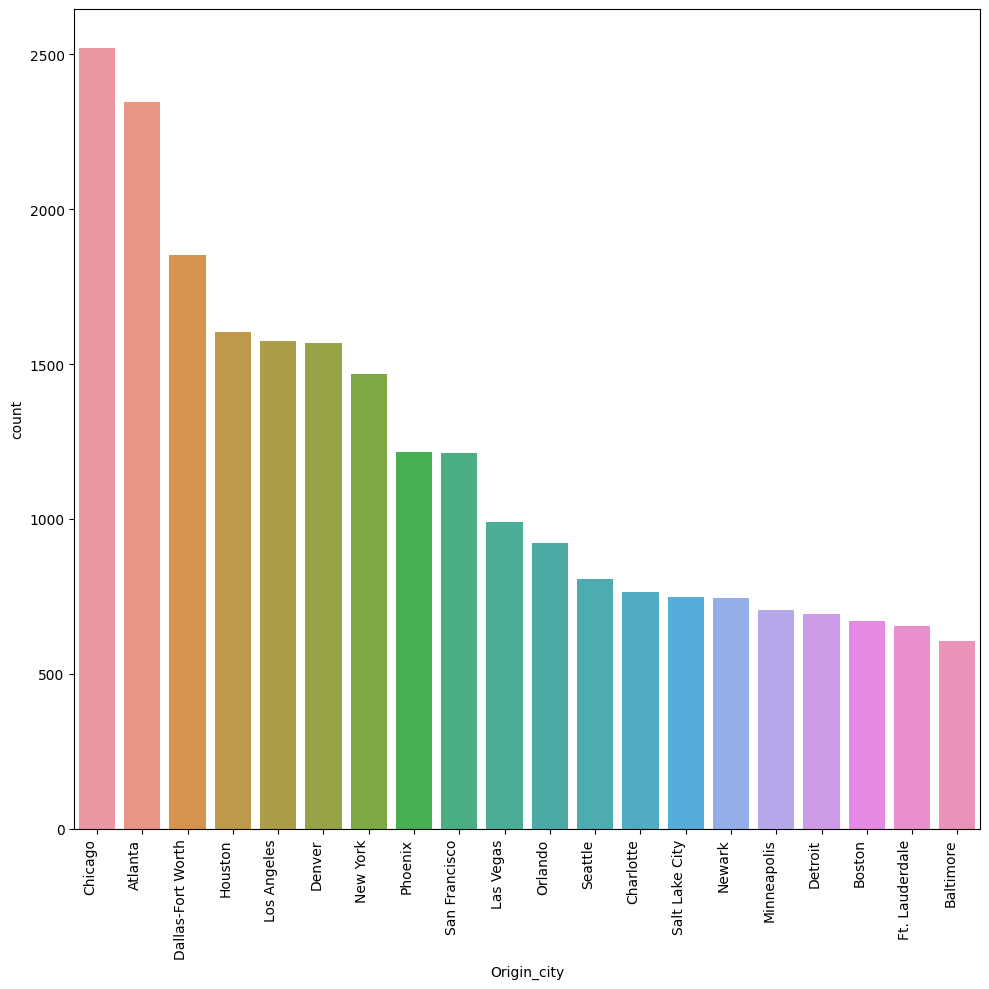

In [50]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=Flights['Origin_city'], data = Flights,
              order=Flights['Origin_city'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

# The Figure shows that Atlanta has the highest count of flight from origin city 

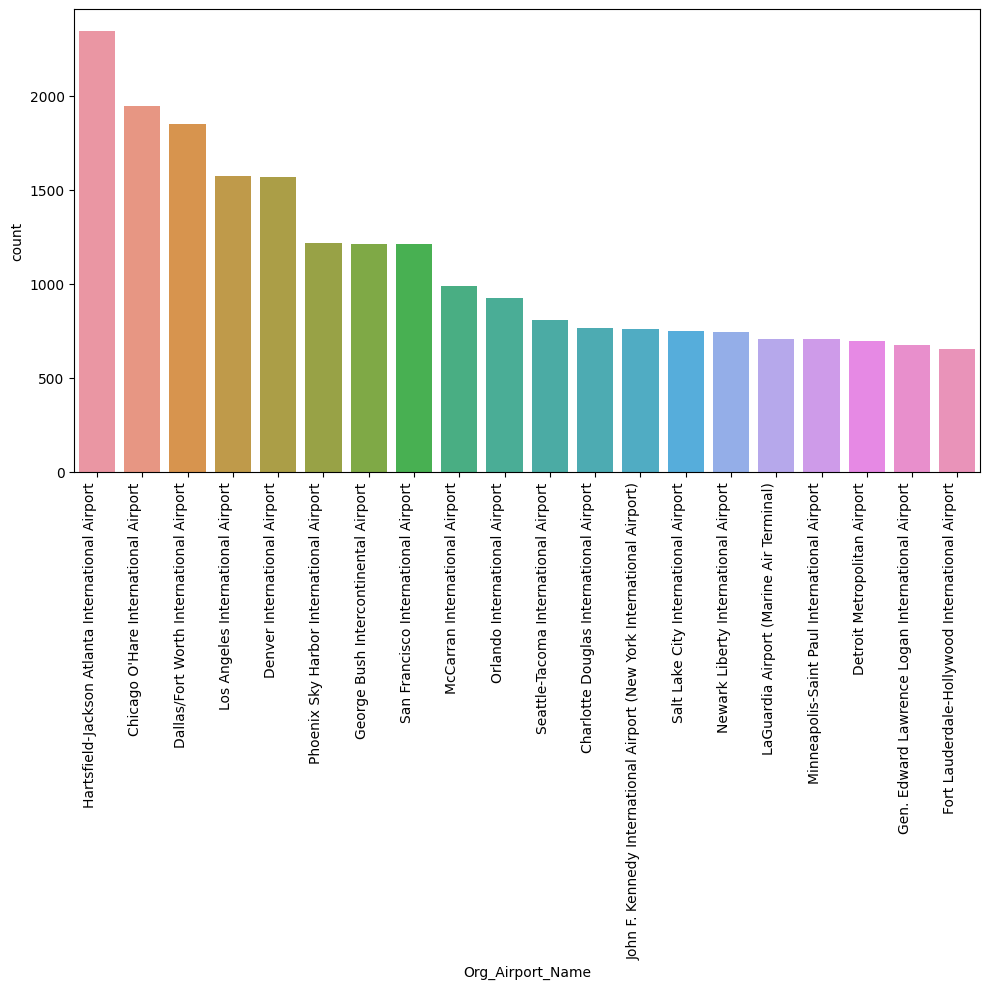

In [51]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=Flights['Org_Airport_Name'], data = Flights,
              order=Flights['Org_Airport_Name'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

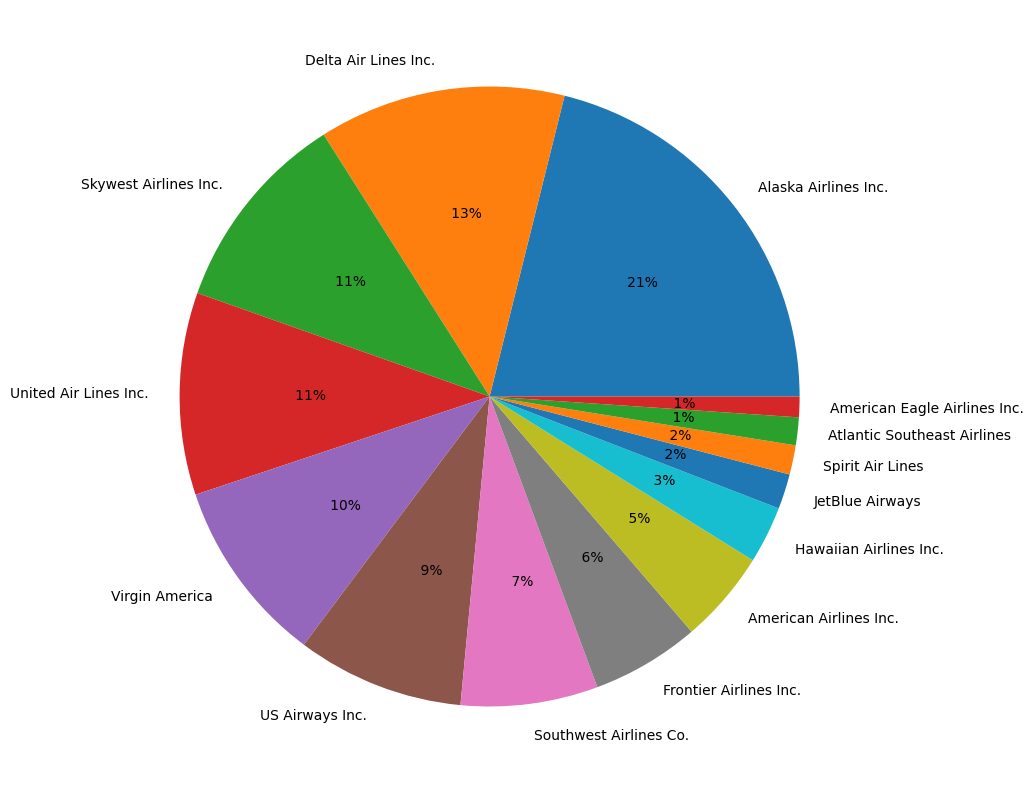

In [52]:
axis = plt.subplots(figsize=(10,14))
Name = Flights["AIRLINE"].unique()
size = Flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

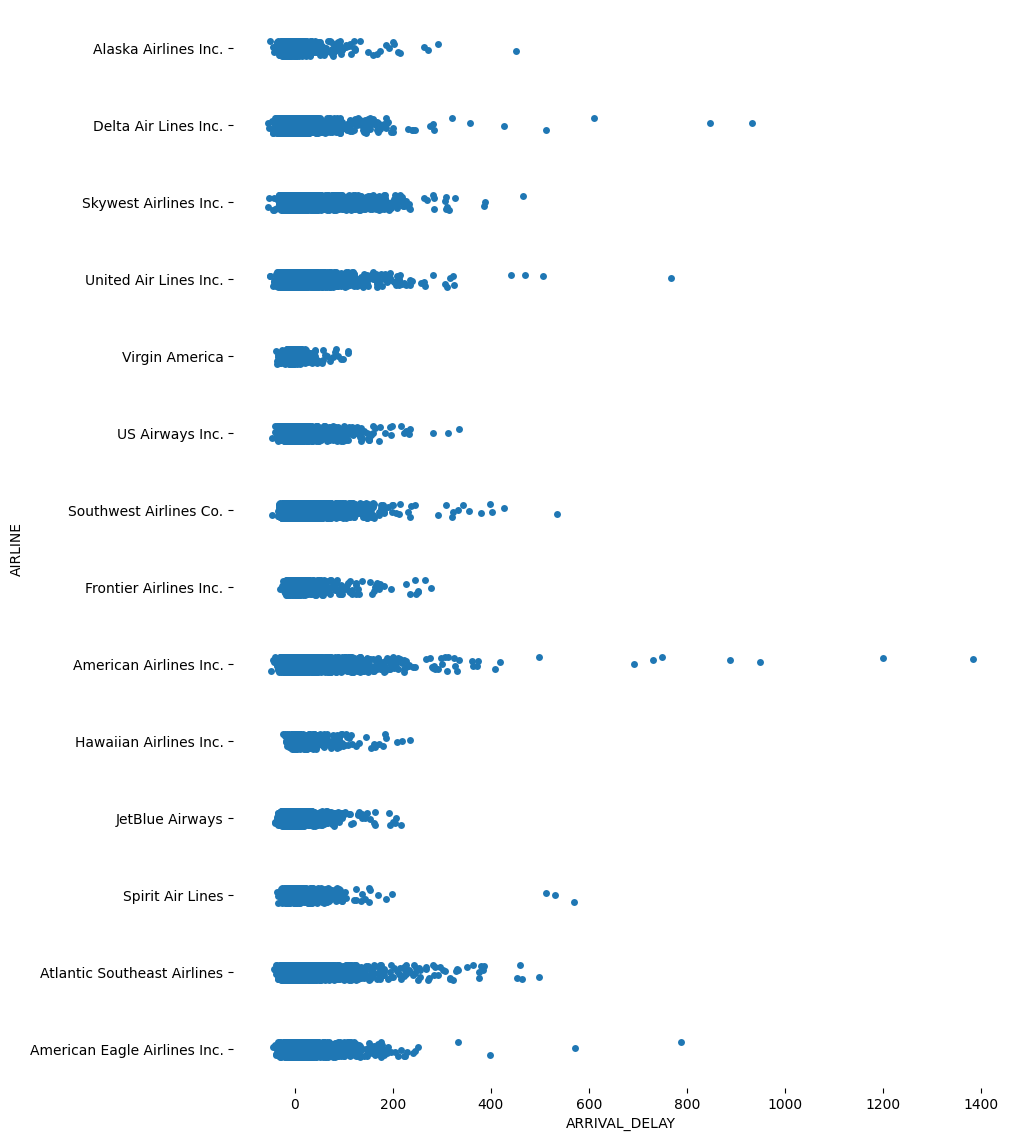

In [53]:
axis = plt.subplots(figsize=(10,14))
sns.despine(bottom=True, left=True)
# Observations with Scatter Plot
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",
              data = Flights, dodge=True, jitter=True
            )
plt.show()

American Airlines Inc has the highest Arrival Delay.

In [54]:
%%html
<div class='tableauPlaceholder' id='viz1569936847474' style='position: relative'><noscript><a href='#'><img alt=' ' 
src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;9B&#47;9BD44NRJ9&#47;1_rss.png' style='border: none'
/></a></noscript><object class='tableauViz'  
style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' 
/> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;9BD44NRJ9' 
/> <param name='toolbar' value='yes' 
/><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;9B&#47;9BD44NRJ9&#47;1.png' 
/> <param name='animate_transition' value='yes'
/><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' 
/><param name='display_overlay' value='yes' /><param name='display_count' value='yes' 
/><param name='filter' value='publish=yes' /></object></div>                
<script type='text/javascript'>                    
var divElement = document.getElementById('viz1569936847474');                    
var vizElement = divElement.getElementsByTagName('object')[0];                    
vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    
var scriptElement = document.createElement('script');                    
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
vizElement.parentNode.insertBefore(scriptElement, vizElement);               
</script>

# Tableau Visualization to give more clear Insight and Inferences

[Text(0.5, 0, 'TAXI_TIME (TAXI_OUT: green, TAXI_IN: blue)')]

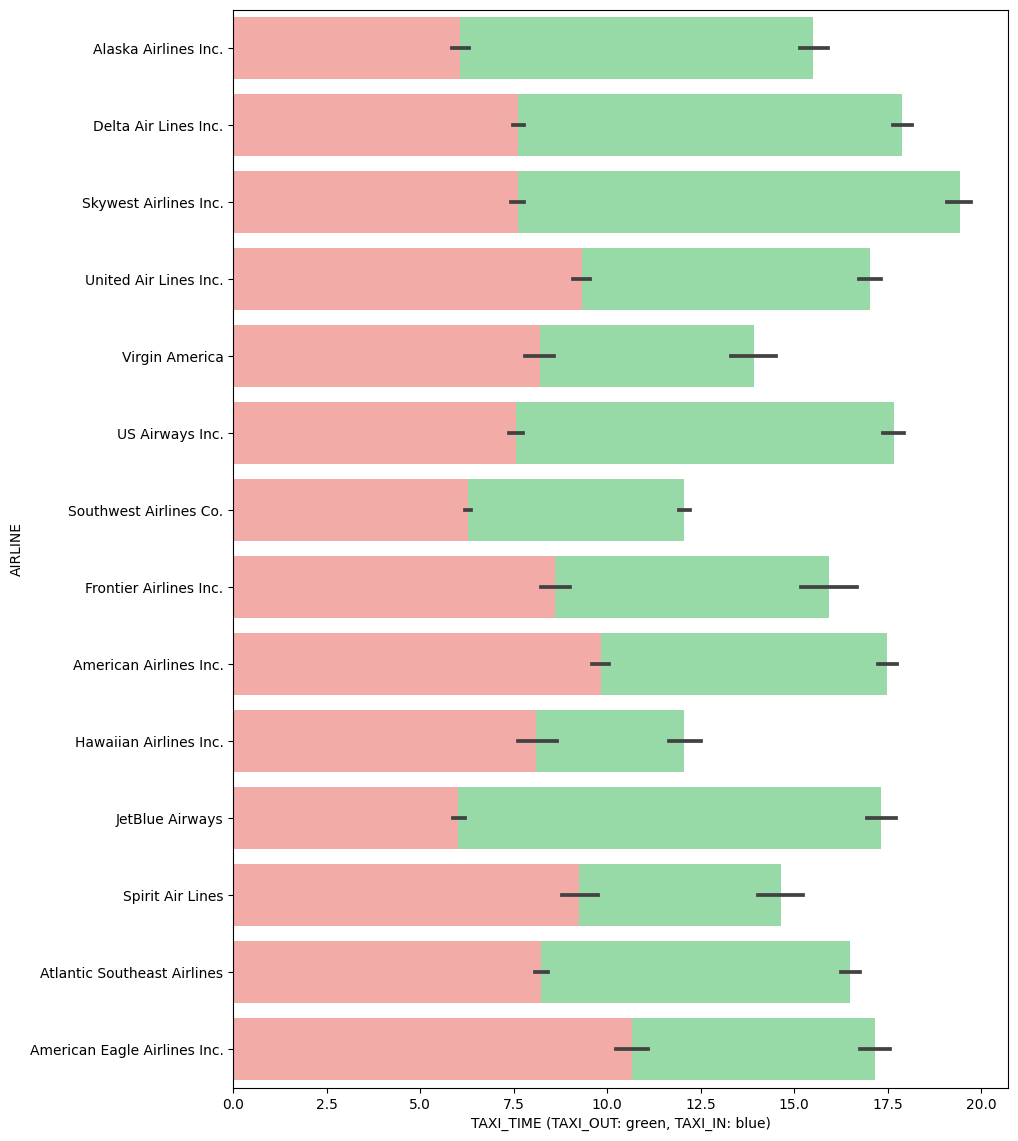

In [55]:
# Plot to show the Taxi In and Taxi Out Time
axis = plt.subplots(figsize=(10,14))
sns.set_color_codes("pastel")
sns.set_context("notebook", font_scale=1.5)
axis = sns.barplot(x="TAXI_OUT", y="AIRLINE", data=Flights, color="g")
axis = sns.barplot(x="TAXI_IN", y="AIRLINE", data=Flights, color="r")
axis.set(xlabel="TAXI_TIME (TAXI_OUT: green, TAXI_IN: blue)")

<ipython-input-56-5655f4a2d38b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Flights.corr(),annot = True)


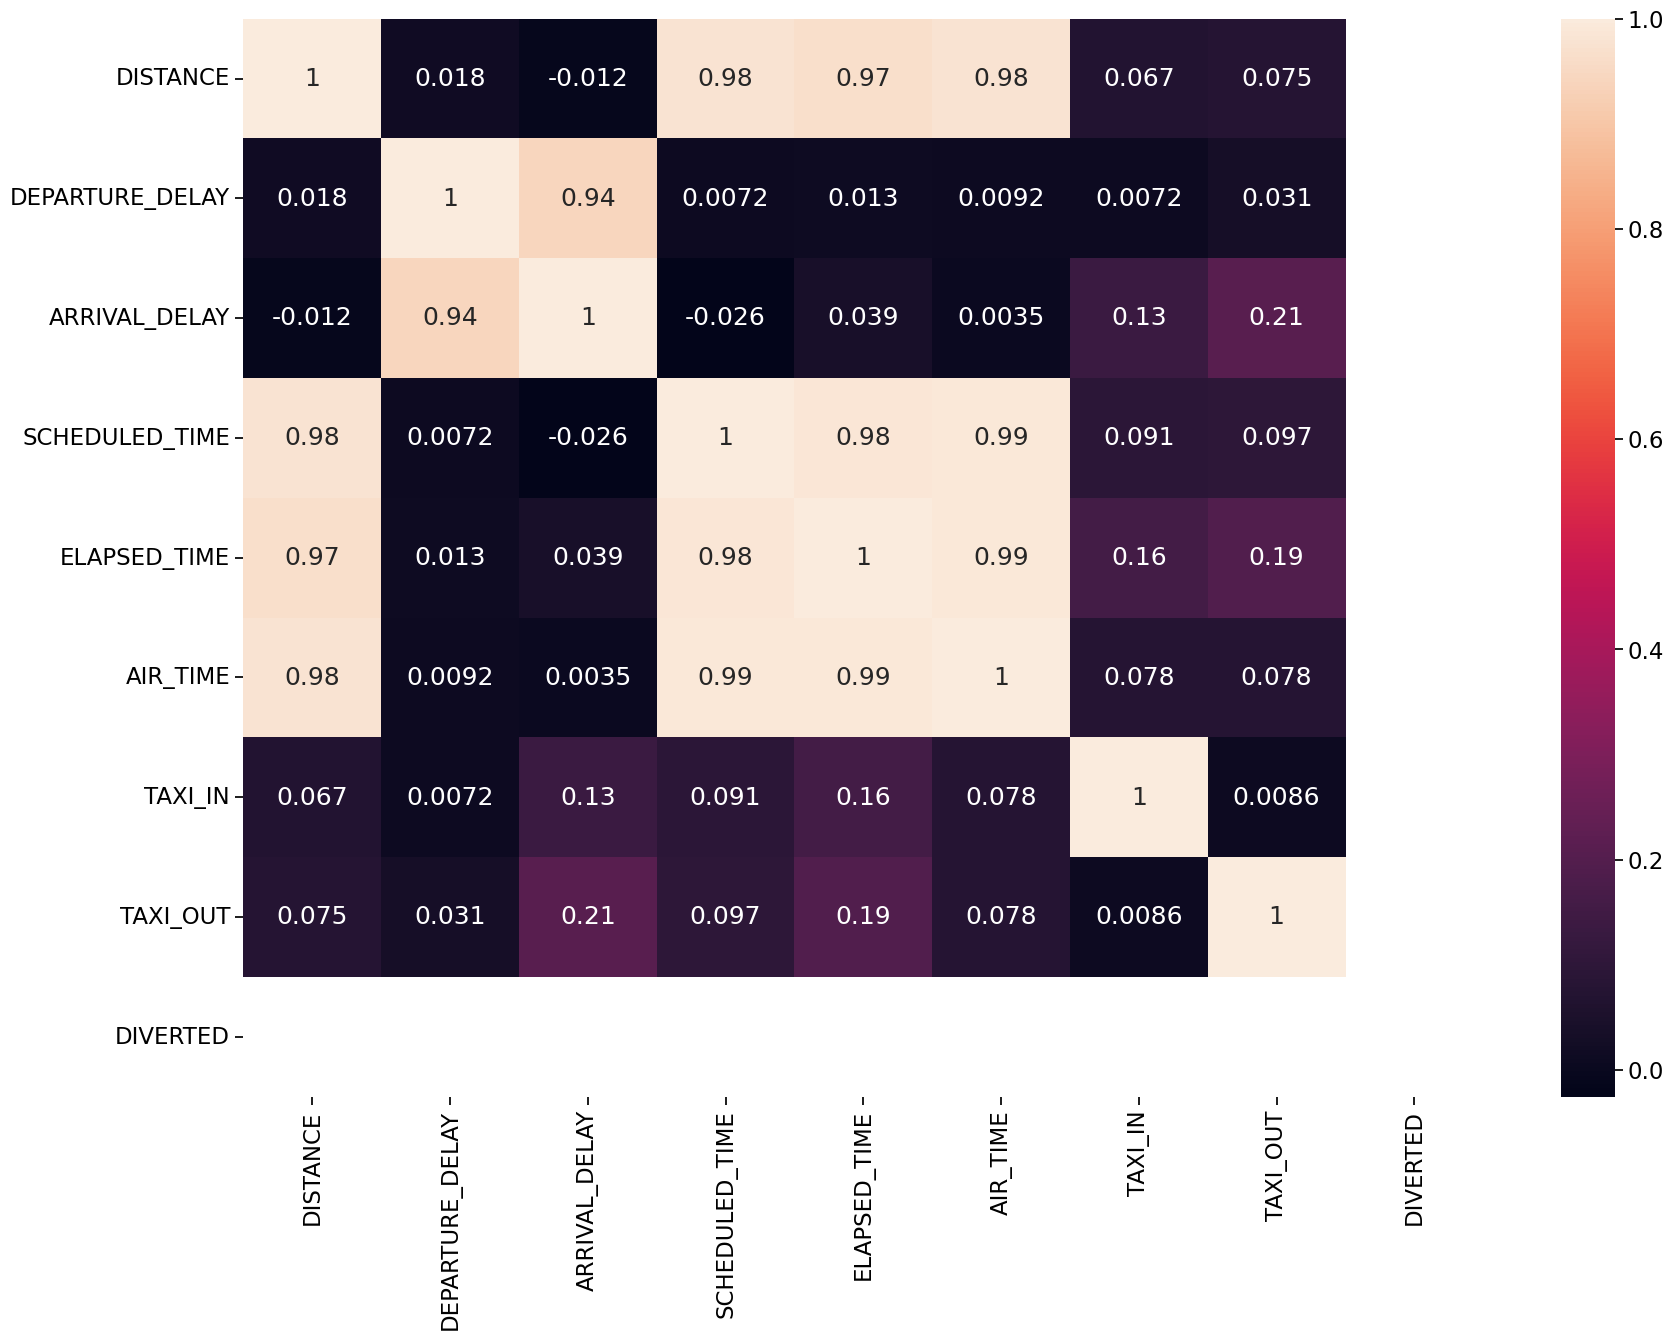

In [56]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(Flights.corr(),annot = True)
plt.show()

# Very High Correlation Between Arrival Delay and Departure Delay

It shows that maximum of the Arrival Delays are due to the Departure Delays but some flights has still arrived on time even after departed late from the Origin Airport. Now we need to check why departure Delay is happening in the origin Airport Which may be due to security Delays, Air System Delays etc.

In [57]:
%%html
<div class='tableauPlaceholder' id='viz1569938215526' style='position: relative'><noscript><a href='#'><img alt=' ' 
src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;PH&#47;PHNKQPSZG&#47;1_rss.png' style='border: none'
/></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' 
/> <param name='embed_code_version' value='3' 
/> <param name='path' value='shared&#47;PHNKQPSZG' 
/> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;PH&#47;PHNKQPSZG&#47;1.png' 
/> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes'
/><param name='display_overlay' value='yes' 
/><param name='display_count' value='yes' /></object></div>                
<script type='text/javascript'>                   
var divElement = document.getElementById('viz1569938215526');                   
var vizElement = divElement.getElementsByTagName('object')[0];                   
vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                   
var scriptElement = document.createElement('script');                    
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                   
vizElement.parentNode.insertBefore(scriptElement, vizElement);               
</script>

# Tableau Visualization to give more clear Insight and Inferences

# Prediction

In [58]:
Flights.head()

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,...,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,23:54:00,2015-01-01,...,-11.0,04:08:00,04:30:00,-22.0,205,194.0,169.0,4.0,21.0,0.0
1,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,00:41:00,2015-01-01,...,-4.0,04:55:00,05:09:00,-14.0,204,194.0,173.0,4.0,17.0,0.0
2,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,01:40:00,2015-01-01,...,-15.0,05:58:00,06:33:00,-35.0,218,198.0,170.0,11.0,17.0,0.0
3,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,02:09:00,2015-01-01,...,-11.0,06:28:00,06:40:00,-12.0,200,199.0,176.0,8.0,15.0,0.0
4,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,04:57:00,2015-01-01,...,-8.0,09:16:00,09:30:00,-14.0,205,199.0,179.0,4.0,16.0,0.0


In [59]:
# Dropping unncecssary columns before prediction
Flights1 = Flights.drop(['Org_Airport_Name','Origin_city','Dest_Airport_Name','Destination_city'],axis = 1)

In [60]:
Flights1.columns

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DISTANCE',
       'Actual_Departure', 'Date', 'Day', 'Scheduled_Departure',
       'DEPARTURE_DELAY', 'Actual_Arrival', 'Scheduled_Arrival',
       'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'TAXI_IN', 'TAXI_OUT', 'DIVERTED'],
      dtype='object')

<ipython-input-66-a7a842f42c4f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Flights1['AIR_TIME'])


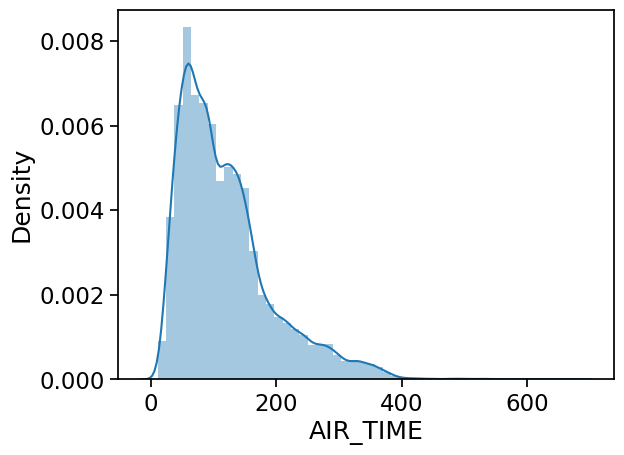

In [66]:
# To check the Distribution of Air Time
sns.distplot(Flights1['AIR_TIME'])
plt.show()

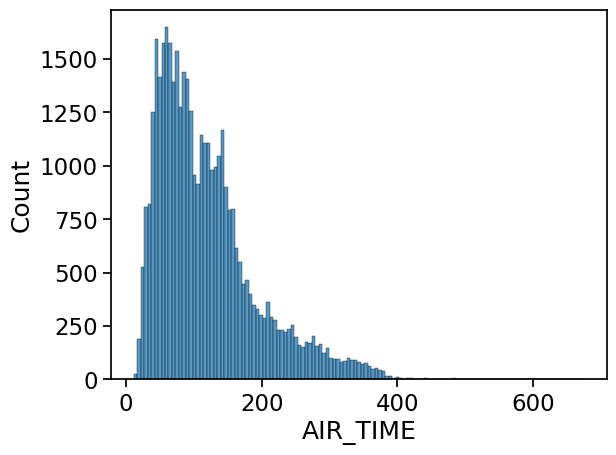

In [67]:
# To check the Distribution of Air Time
sns.histplot(Flights1['AIR_TIME'])
plt.show()

<ipython-input-68-323675a434a5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Flights1['ELAPSED_TIME'])


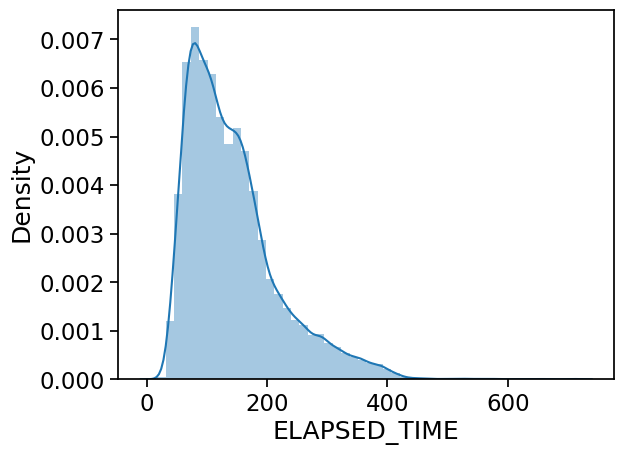

In [68]:
# To check the Distribution of Elapsed Time
sns.distplot(Flights1['ELAPSED_TIME'])
plt.show()

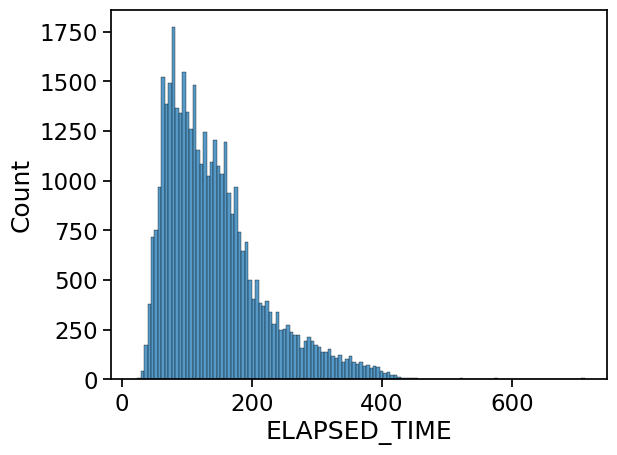

In [69]:
# To check the Distribution of Elapsed Time
sns.histplot(Flights1['ELAPSED_TIME'])
plt.show()

<ipython-input-70-a96e630cc149>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Flights1['TAXI_IN'])


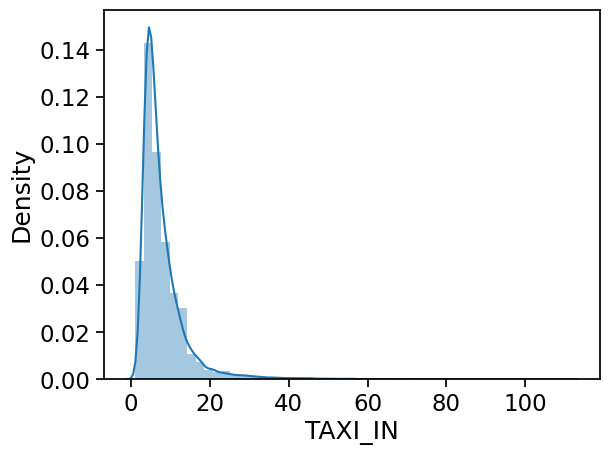

In [70]:
# To check the Distribution of Taxi IN
sns.distplot(Flights1['TAXI_IN'])
plt.show()

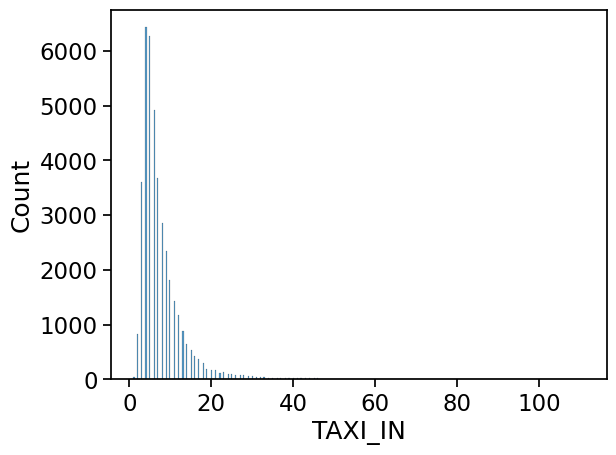

In [71]:
# To check the Distribution of Taxi IN
sns.histplot(Flights1['TAXI_IN'])
plt.show()

<ipython-input-72-53c7a34b5c64>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Flights1['TAXI_OUT'])


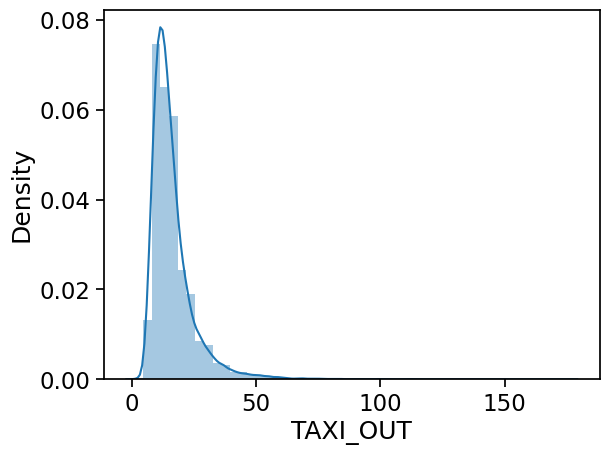

In [72]:
# To check the Distribution of Taxi out
sns.distplot(Flights1['TAXI_OUT'])
plt.show()

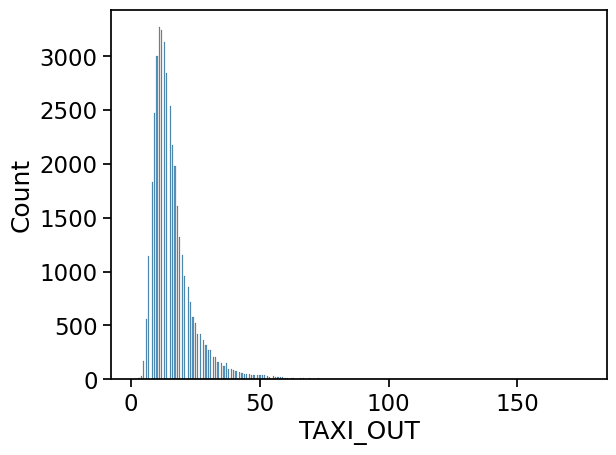

In [73]:
# To check the Distribution of Taxi out
sns.histplot(Flights1['TAXI_OUT'])
plt.show()

In [74]:
# importing Various regression algorithms 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [75]:
Las = Lasso()
LinR = LinearRegression()
Rid = Ridge()
Rfc = RandomForestRegressor(random_state=2)
Dtc = DecisionTreeRegressor(random_state = 2)
Boost_Lin = AdaBoostRegressor(base_estimator=LinR,random_state=2)
Boost_las = AdaBoostRegressor(base_estimator=Las,random_state=2)
Boost_rid = AdaBoostRegressor(base_estimator=Rid,random_state=2)
Bg_Lin = BaggingRegressor(base_estimator=LinR,random_state=2)
Bg_las = BaggingRegressor(base_estimator=Las,random_state=2)
Bg_rid = BaggingRegressor(base_estimator=Rid,random_state=2)

In [76]:
le = LabelEncoder()

In [77]:
# Label encoding features to change categorical variables into numerical one
Flights1['AIRLINE']= le.fit_transform(Flights1['AIRLINE'])
Flights1['ORIGIN_AIRPORT'] = le.fit_transform(Flights1['ORIGIN_AIRPORT'])
Flights1['DESTINATION_AIRPORT'] = le.fit_transform(Flights1['DESTINATION_AIRPORT'])
Flights1['Day'] = le.fit_transform(Flights1['Day'])

In [78]:
Flights1 = Flights1.drop(['Scheduled_Departure','Scheduled_Arrival','Actual_Arrival','Date','Actual_Departure'], axis = 1)

In [79]:
Flights1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40441 entries, 0 to 40452
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AIRLINE              40441 non-null  int64  
 1   ORIGIN_AIRPORT       40441 non-null  int64  
 2   DESTINATION_AIRPORT  40441 non-null  int64  
 3   DISTANCE             40441 non-null  float64
 4   Day                  40441 non-null  int64  
 5   DEPARTURE_DELAY      40441 non-null  float64
 6   ARRIVAL_DELAY        40441 non-null  float64
 7   SCHEDULED_TIME       40441 non-null  int64  
 8   ELAPSED_TIME         40441 non-null  float64
 9   AIR_TIME             40441 non-null  float64
 10  TAXI_IN              40441 non-null  float64
 11  TAXI_OUT             40441 non-null  float64
 12  DIVERTED             40441 non-null  float64
dtypes: float64(8), int64(5)
memory usage: 4.3 MB


In [80]:
X = Flights1.drop('ARRIVAL_DELAY',axis = 1)
X.shape

(40441, 12)

In [81]:
y = Flights1['ARRIVAL_DELAY']
y.head()

0   -22.0
1   -14.0
2   -35.0
3   -12.0
4   -14.0
Name: ARRIVAL_DELAY, dtype: float64

In [82]:
# Splitting into train and test data set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

In [83]:
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

# Model fitting and results

In [84]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
    print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
    print('R2 : ',r2_score(y_test, Y_predict))
    print()

Lasso
Mean Absolute Error: 7.6334991969504555
Mean Squared Error: 100.24524043917077
Root Mean Squared Error: 10.012254513303724
R2 :  0.9355706903004518

Linear Regression
Mean Absolute Error: 3.659319978364442e-14
Mean Squared Error: 2.306301792233452e-27
Root Mean Squared Error: 4.8023971016914583e-14
R2 :  1.0

Ridge
Mean Absolute Error: 0.02427039419450839
Mean Squared Error: 0.000995060258010145
Root Mean Squared Error: 0.03154457573038739
R2 :  0.9999993604579603

Random forest Regressor
Mean Absolute Error: 7.16574631171186
Mean Squared Error: 109.90703041292343
Root Mean Squared Error: 10.483655393655566
R2 :  0.9293608946458777

Decision Tree Regressor
Mean Absolute Error: 4.704372372867387
Mean Squared Error: 51.26726554850408
Root Mean Squared Error: 7.160116308308412
R2 :  0.9670496622582506

Boosted Linear
Mean Absolute Error: 3.920671218289719e-14
Mean Squared Error: 2.582993600673863e-27
Root Mean Squared Error: 5.082316008154022e-14
R2 :  1.0



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosted Lasso
Mean Absolute Error: 4.926052048893757
Mean Squared Error: 41.31215366593205
Root Mean Squared Error: 6.427453124366762
R2 :  0.9734479808593726



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosted Ridge
Mean Absolute Error: 0.008831406862200977
Mean Squared Error: 0.0001297545619320128
Root Mean Squared Error: 0.011390985994724635
R2 :  0.9999999166045508



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagged Linear
Mean Absolute Error: 6.792700050799764e-14
Mean Squared Error: 8.021377031857354e-27
Root Mean Squared Error: 8.956214061676593e-14
R2 :  1.0

Bagged Lasso
Mean Absolute Error: 7.632762567958199
Mean Squared Error: 100.20416273740365
Root Mean Squared Error: 10.010202931879236
R2 :  0.9355970916333959



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagged Ridge
Mean Absolute Error: 0.024193303945598783
Mean Squared Error: 0.000988498674199135
Root Mean Squared Error: 0.031440398760180115
R2 :  0.9999993646752011



# Model Analysis

Lasso


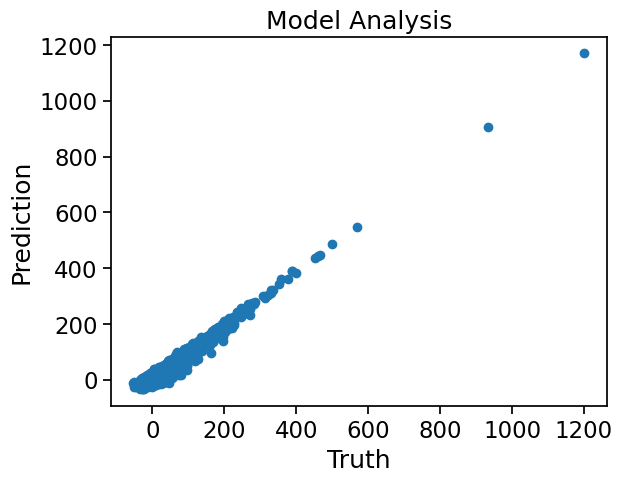

Linear Regression


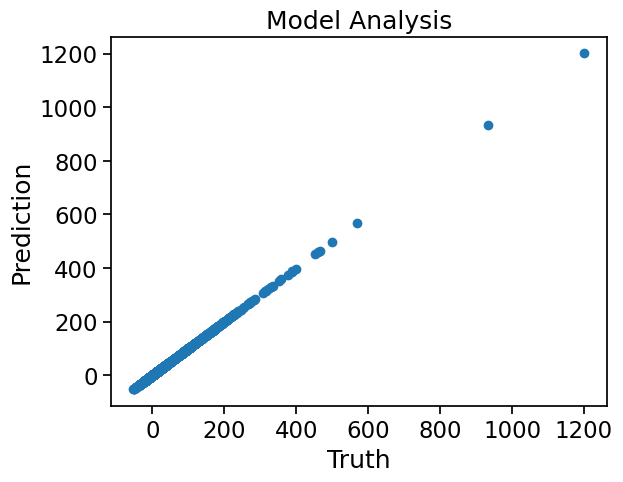

Ridge


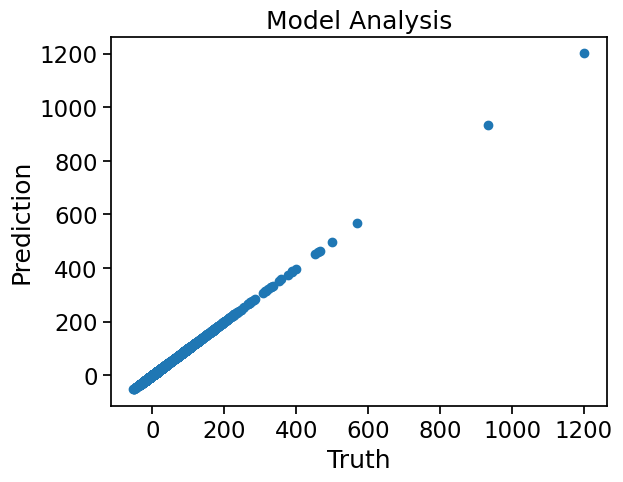

Random forest Regressor


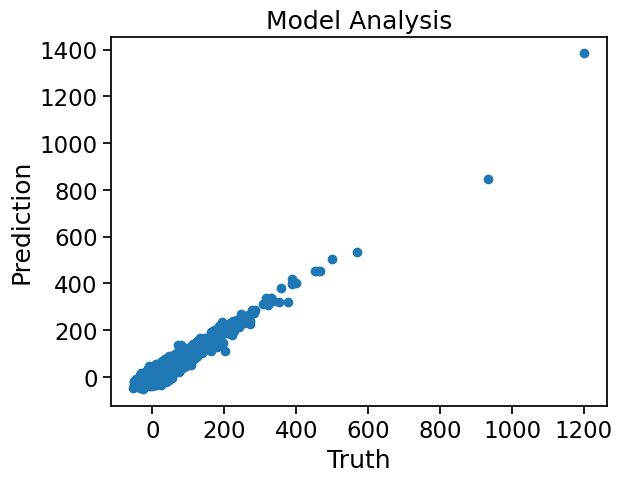

Decision Tree Regressor


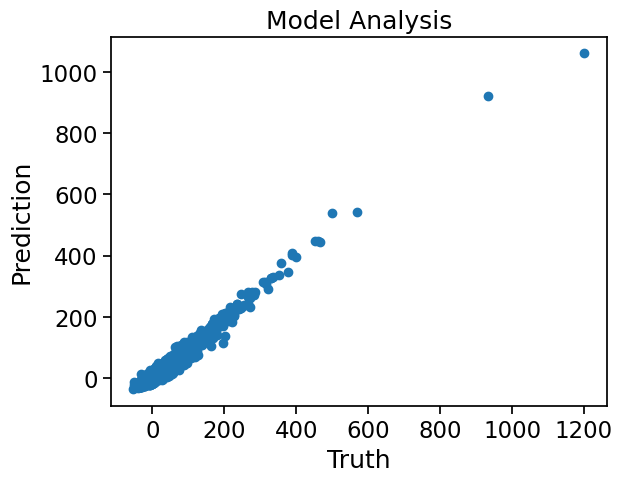

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosted Linear


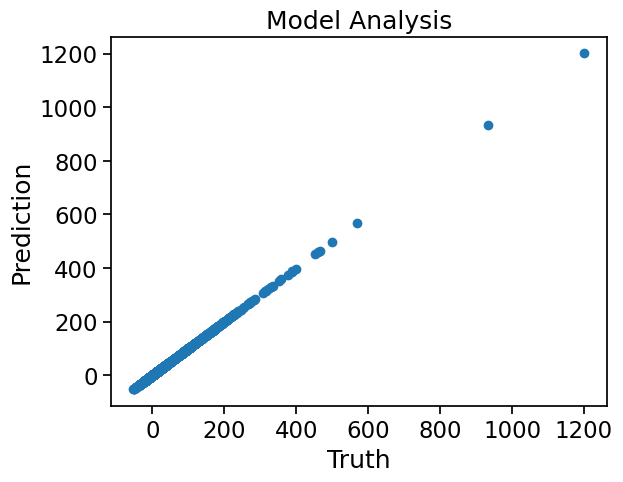

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosted Lasso


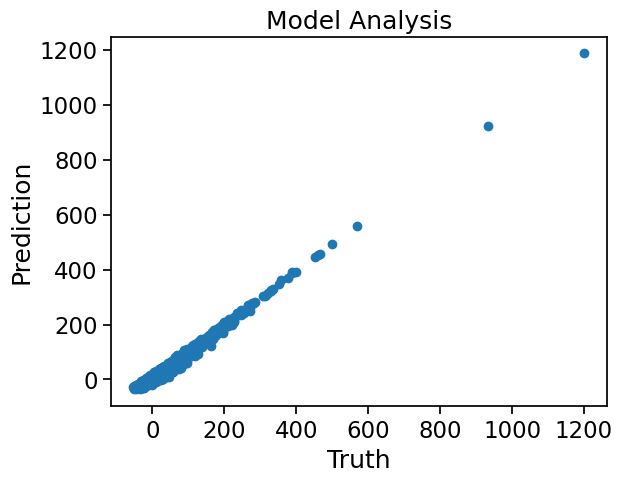

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosted Ridge


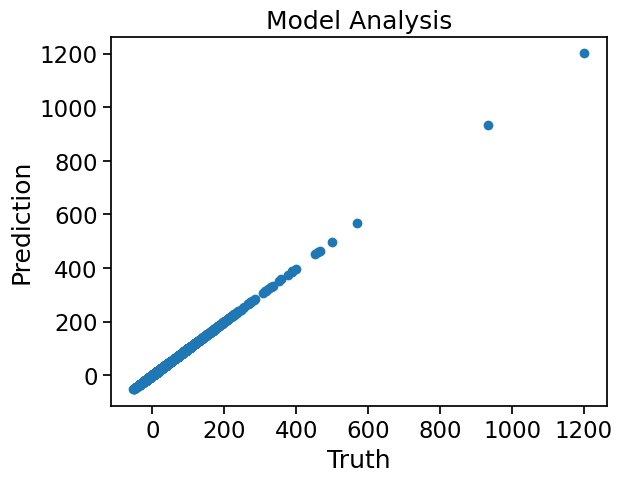

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagged Linear


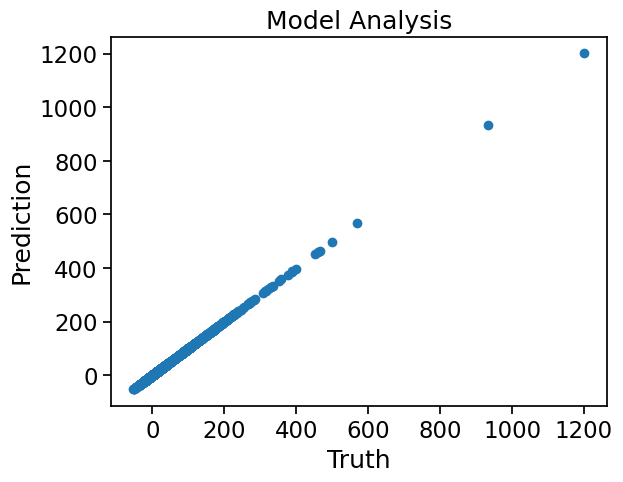

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagged Lasso


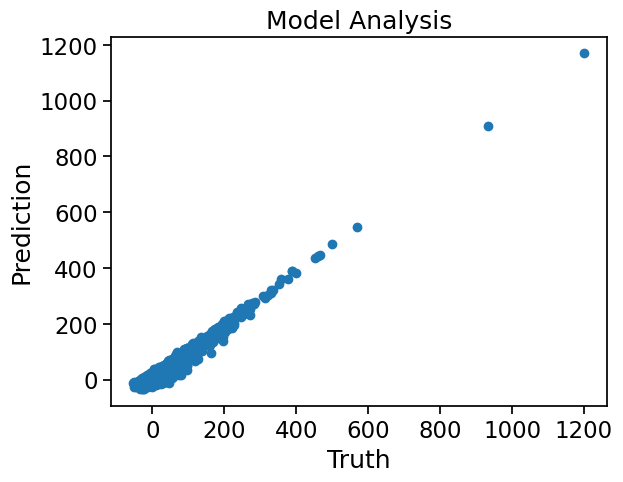

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagged Ridge


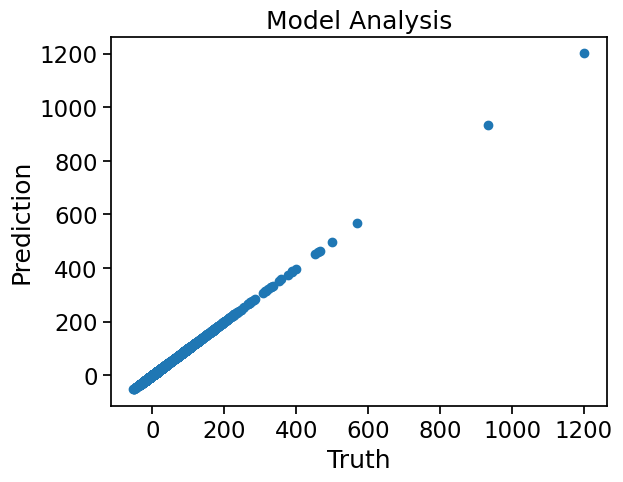

In [85]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    plt.scatter(y_test, Y_predict)
    plt.title("Model Analysis")
    plt.xlabel("Truth")
    plt.ylabel("Prediction")
    plt.show()

# When Flight_Delays is taken, where I took all the different Delays into Concern.

I removed the null values present in all the different types of Delays and proceeded with prediction of the Arrival Delays. 

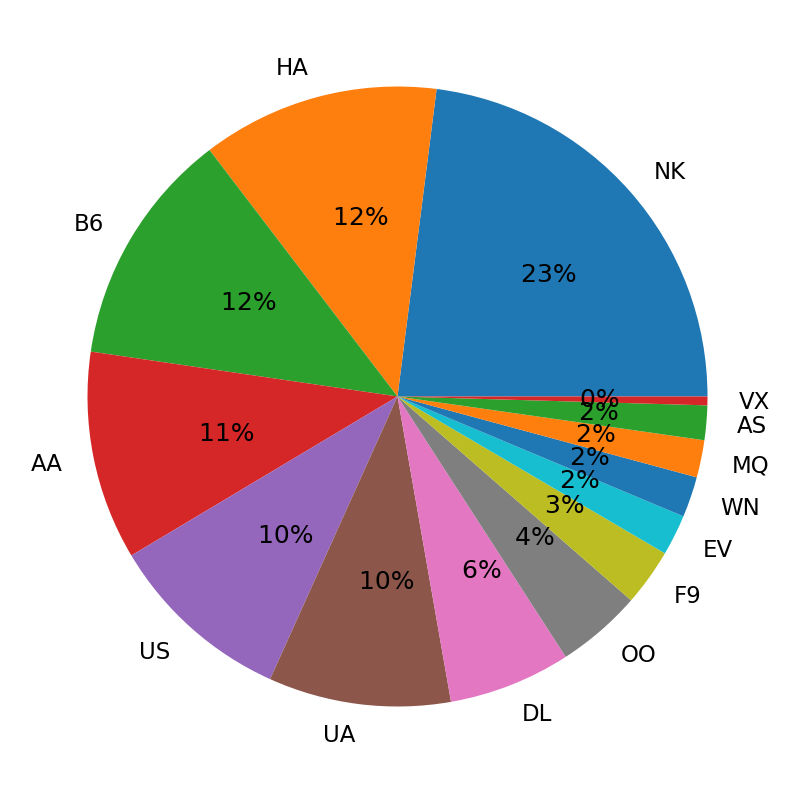

In [86]:
axis = plt.subplots(figsize=(10,14))
Name = Flight_Delays["AIRLINE"].unique()
size = Flight_Delays["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

In [87]:
Flight_Delays

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,ELAPSED_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
27,NK,MSP,FLL,12.0,14.0,220.0,1487.0,40.0,25.0,25.0,0.0,0.0,0.0,0.0
30,NK,PHX,ORD,72.0,9.0,175.0,1440.0,10.0,43.0,43.0,0.0,0.0,0.0,0.0
35,HA,LAS,HNL,0.0,16.0,385.0,2762.0,8.0,15.0,0.0,0.0,15.0,0.0,0.0
50,B6,BQN,MCO,-3.0,25.0,196.0,1129.0,11.0,20.0,20.0,0.0,0.0,0.0,0.0
52,B6,SJU,MCO,95.0,9.0,175.0,1189.0,3.0,85.0,0.0,0.0,85.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41534,WN,MKE,LGA,52.0,20.0,117.0,738.0,6.0,44.0,0.0,0.0,40.0,4.0,0.0
41536,WN,PIT,MCO,17.0,10.0,141.0,834.0,12.0,18.0,1.0,0.0,5.0,12.0,0.0
41537,WN,LAS,HOU,128.0,9.0,157.0,1235.0,3.0,110.0,0.0,0.0,0.0,110.0,0.0
41538,WN,LAS,MCI,16.0,19.0,167.0,1139.0,5.0,23.0,7.0,0.0,8.0,8.0,0.0


In [88]:
Flight_Delays['ORIGIN_AIRPORT'] = Flight_Delays['ORIGIN_AIRPORT'].astype(str)
Flight_Delays['DESTINATION_AIRPORT'] = Flight_Delays['DESTINATION_AIRPORT'].astype(str)

In [89]:
Flight_Delays['AIRLINE']= le.fit_transform(Flight_Delays['AIRLINE'])
Flight_Delays['ORIGIN_AIRPORT'] = le.fit_transform(Flight_Delays['ORIGIN_AIRPORT'])
Flight_Delays['DESTINATION_AIRPORT'] = le.fit_transform(Flight_Delays['DESTINATION_AIRPORT'])

In [90]:
X = Flight_Delays.drop('ARRIVAL_DELAY',axis = 1)
X.shape
y = Flight_Delays['ARRIVAL_DELAY']
y.head()

27    25.0
30    43.0
35    15.0
50    20.0
52    85.0
Name: ARRIVAL_DELAY, dtype: float64

In [91]:
# Splitting the Data into Training and Testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

In [92]:
# Scalling of the Data
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

# Model fitting and results

In [93]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
    print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
    print('R2 : ',r2_score(y_test, Y_predict))
    print()

Lasso
Mean Absolute Error: 3.2686568634298094
Mean Squared Error: 21.24554322886389
Root Mean Squared Error: 4.609288798596145
R2 :  0.9944894378370911

Linear Regression
Mean Absolute Error: 6.046237648370548e-14
Mean Squared Error: 7.37968650498368e-27
Root Mean Squared Error: 8.590510174013928e-14
R2 :  1.0

Ridge
Mean Absolute Error: 0.0369680703188704
Mean Squared Error: 0.00235990674247017
Root Mean Squared Error: 0.0485788713585461
R2 :  0.9999993878992567

Random forest Regressor
Mean Absolute Error: 3.8247274813539875
Mean Squared Error: 338.482214572576
Root Mean Squared Error: 18.397886144135583
R2 :  0.9122061853468084

Decision Tree Regressor
Mean Absolute Error: 2.3445352839931153
Mean Squared Error: 90.89687260470455
Root Mean Squared Error: 9.533985137638119
R2 :  0.9764236262868662

Boosted Linear
Mean Absolute Error: 7.743203668614585e-14
Mean Squared Error: 2.2334400121709864e-26
Root Mean Squared Error: 1.494469809722159e-13
R2 :  1.0



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosted Lasso
Mean Absolute Error: 1.630552305926546
Mean Squared Error: 4.736963230571376
Root Mean Squared Error: 2.176456576771376
R2 :  0.998771350298541

Boosted Ridge
Mean Absolute Error: 0.019850049110845442
Mean Squared Error: 0.0006615435276217041
Root Mean Squared Error: 0.025720488479453577
R2 :  0.9999998284121666



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagged Linear
Mean Absolute Error: 1.6590031445884668e-14
Mean Squared Error: 5.58874686130192e-28
Root Mean Squared Error: 2.364053058055576e-14
R2 :  1.0



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagged Lasso
Mean Absolute Error: 3.2898101251925946
Mean Squared Error: 21.93455484754182
Root Mean Squared Error: 4.683434087028643
R2 :  0.9943107254683468

Bagged Ridge
Mean Absolute Error: 0.036974055070336596
Mean Squared Error: 0.002381963410336725
Root Mean Squared Error: 0.04880536251619001
R2 :  0.9999993821783091



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


# Model Analysis

Lasso


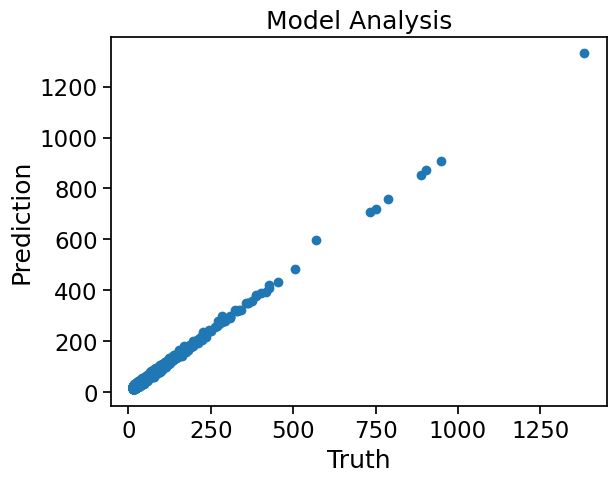

Linear Regression


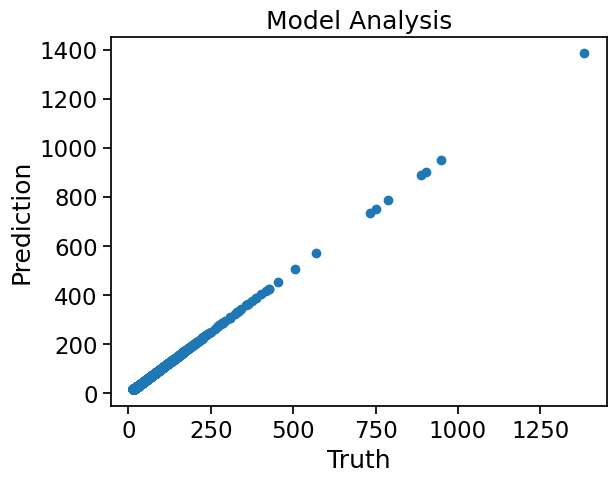

Ridge


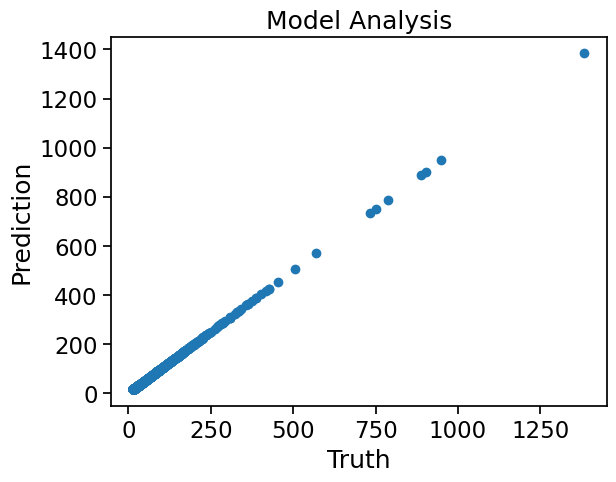

Random forest Regressor


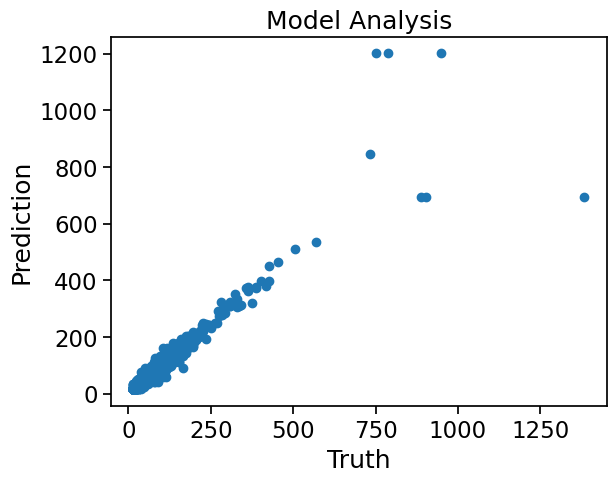

Decision Tree Regressor


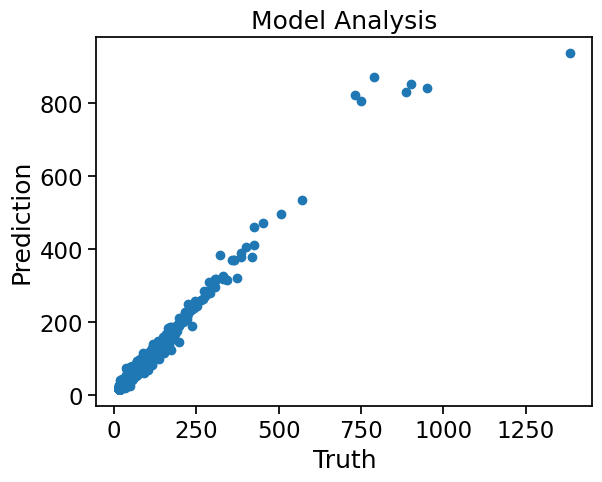

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosted Linear


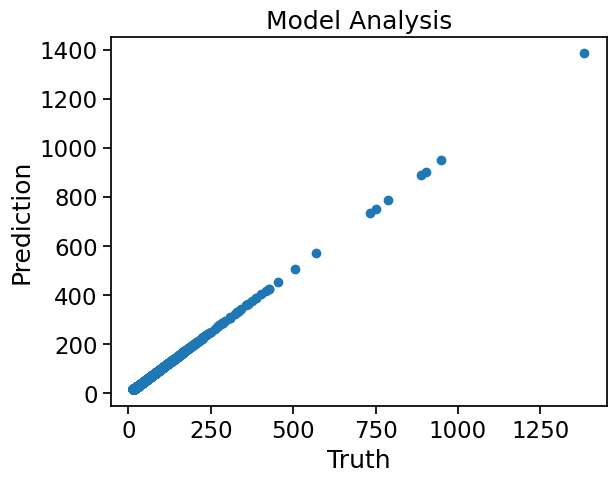

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosted Lasso


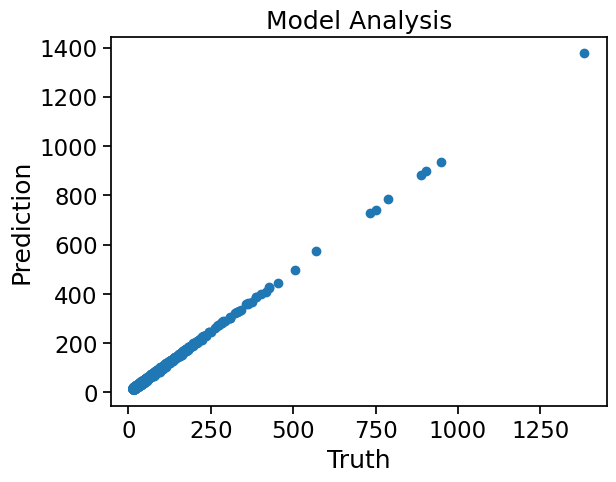

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosted Ridge


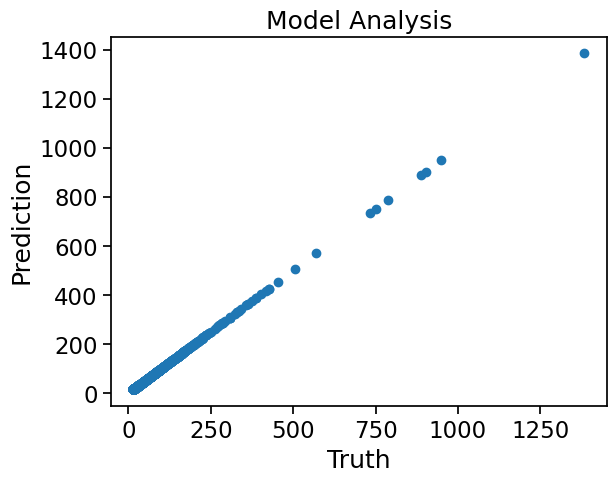

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagged Linear


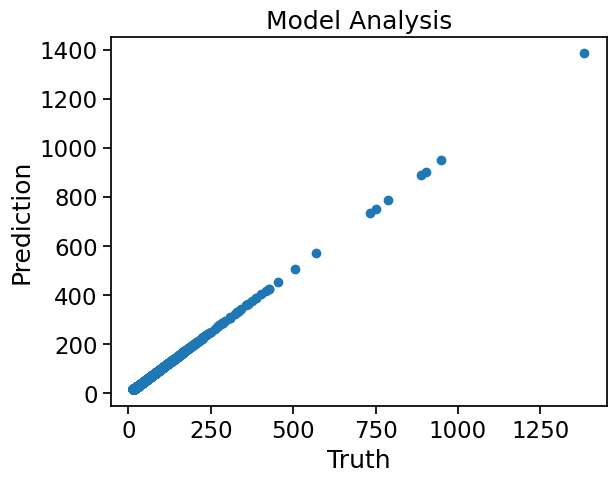

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagged Lasso


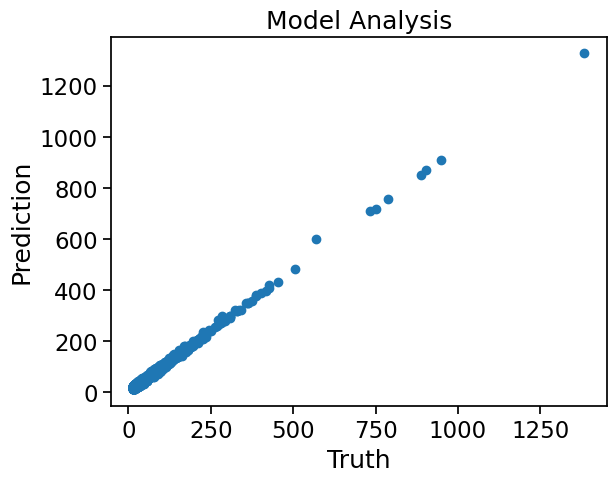

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagged Ridge


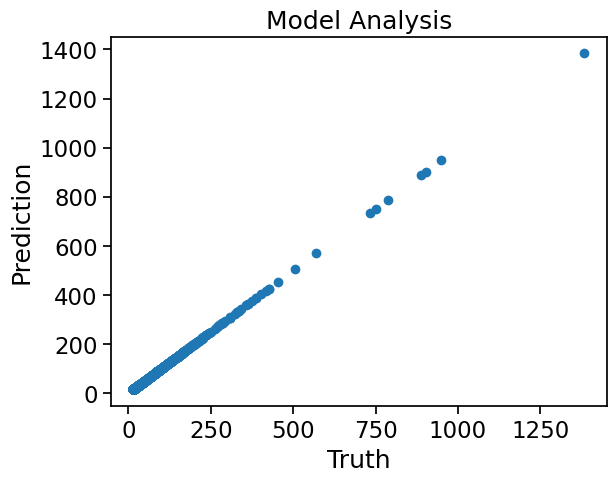

In [94]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    plt.scatter(y_test, Y_predict)
    plt.title("Model Analysis")
    plt.xlabel("Truth")
    plt.ylabel("Prediction")
    plt.show()

# Conclusion

We can see that maximum arrival Delays are dependent on the Departure Delays of the Airport. The first part is dealt with cleaning and exploration of the data set to get more insights and the second part dealt with the sitting of the model to predict the delays. For exploratory Analysis I used visualization tools like tableau and seaborn as well as matplotlib. The Second part dealt with the model fitting and predicting the Arrival delays of the airlines.

We can see that departure delay is the main problem which is creating Delay in the aviation industry. Departure Delays can be caused due Security Delay, Airline System Delays, Airlines Delay etc. The Delays affect the revenue of the company to a great extent so the delays has to be reduced as much as possible so as to increase the profitability in the Airline Industry. Customer Satisfaction will also be greatly enhanced if the delays can be brought down as low as possible.